# Matplotlib fundamentals

In [8]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [4]:
df.shape # long table

(4377, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [12]:
df.head(5)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [27]:
import duckdb 

df_quantity_brand =duckdb.query("""
                SELECT 
                    make AS Brand,
                    SUM(quantity) AS Quantity 
                FROM 
                    df 
                GROUP BY 
                    make
                ORDER BY
                    Quantity
                DESC   
        """).df()

In [28]:
df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


## Bar chart

<Axes: xlabel='Brand'>

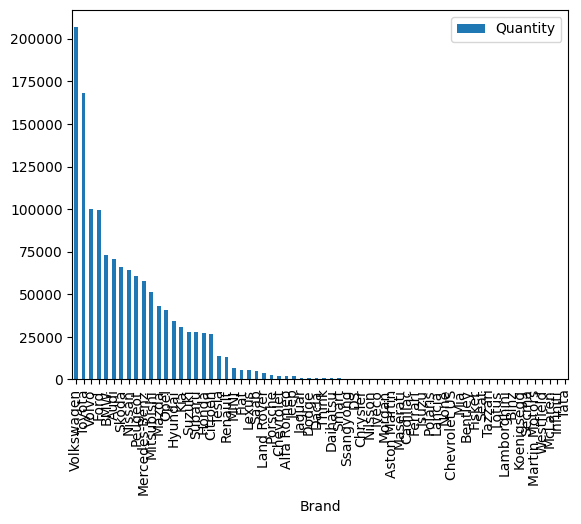

In [29]:

df_quantity_brand.plot(kind= "bar", x = "Brand", y = "Quantity")

# plot top 5 most popular brand

<Axes: xlabel='Brand'>

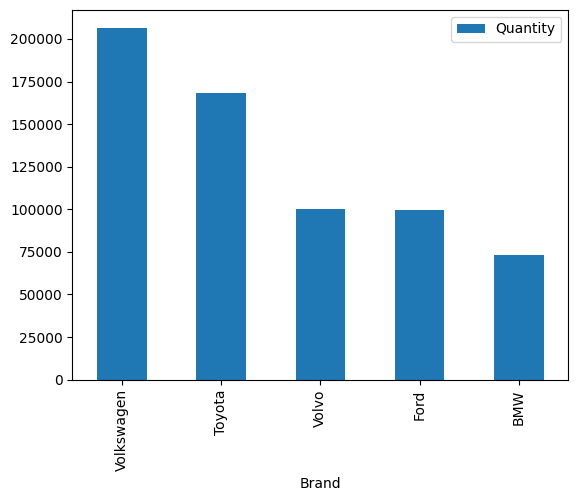

In [32]:
df_quantity_brand.head(5).plot(kind= "bar", x = "Brand", y = "Quantity")



<Axes: xlabel='Brand'>

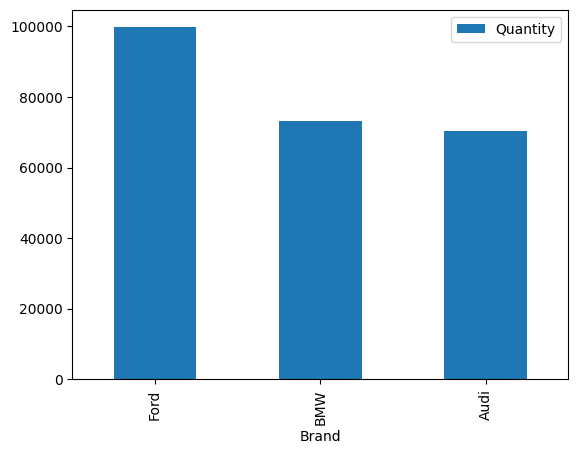

In [33]:
df_quantity_brand.iloc[3:6].plot(kind= "bar", x = "Brand", y = "Quantity")


## Matplotlib bar

In [61]:
import matplotlib.pyplot as plt

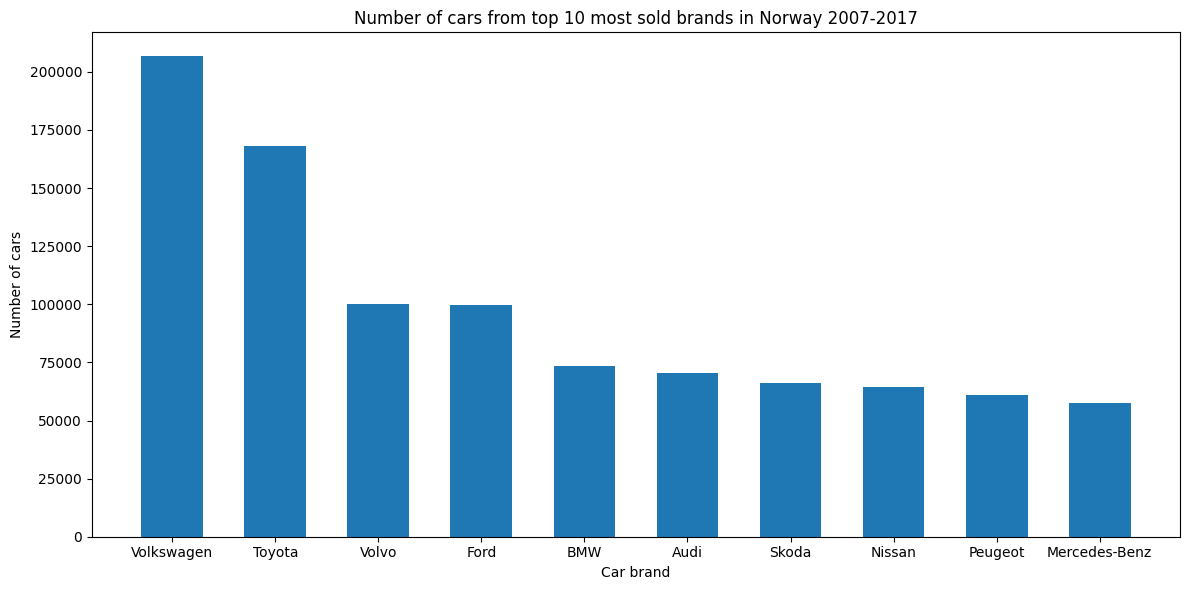

In [81]:


df_quantity_top_10 = df_quantity_brand.iloc[:10]
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(
    x= df_quantity_top_10["Brand"],
    height = df_quantity_top_10["Quantity"],
    width= .6
    
)

ax.set(
    title="Number of cars from top 10 most sold brands in Norway 2007-2017",
    xlabel="Car brand",
    ylabel="Number of cars"
    )


fig.tight_layout()
fig.savefig("figures/bars_top_10.cars.png")



In [70]:
df_quantity_top_10["Quantity"] 


0    206669.0
1    168177.0
2     99937.0
3     99713.0
4     73315.0
5     70475.0
6     66007.0
7     64535.0
8     61033.0
9     57557.0
Name: Quantity, dtype: float64

## Line chart

In [79]:
df_quantity_year = duckdb.query(
                """
                SELECT
                    year,
                    SUM(quantity) AS Quantity
                FROM
                    df 
                GROUP BY
                    year
                ORDER BY
                    year;
                """
                ).df().set_index("Year")
df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


In [80]:
df.tail()

,Year,Month,Make,Quantity,Pct
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0
4376,2017,1,Ssangyong,1,0.0


<Axes: xlabel='Year'>

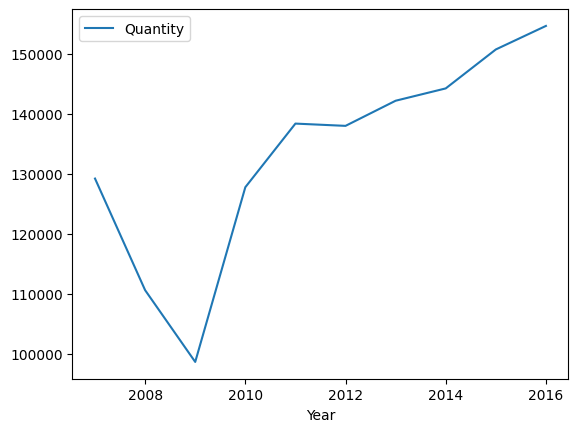

In [65]:
df_quantity_year.iloc[:-1].plot()

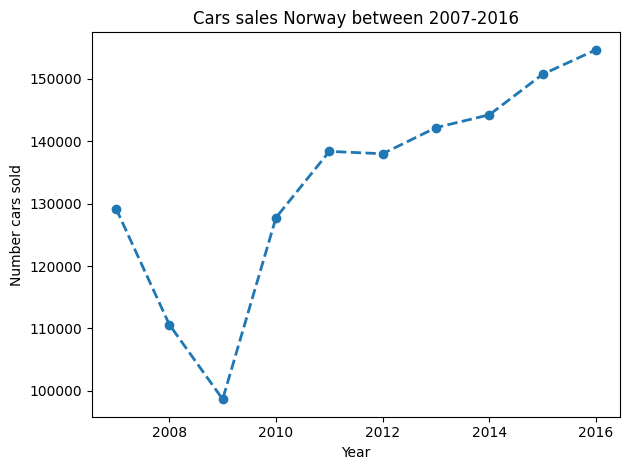

In [67]:
ax = df_quantity_year.iloc[:-1].plot(
    title= "Cars sales Norway between 2007-2016", 
    xlabel= "Year", 
    ylabel= "Number cars sold", 
    style= "--o", 
    linewidth= 2)


ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line.png")